# 總統大選行情事件研究

In [1]:
import pandas as pd
import numpy as np
import tejapi
tejapi.ApiConfig.api_key = "your key"
tejapi.ApiConfig.ignoretz = True

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
election_date = [pd.Timestamp('1996-03-23', tz = 'UTC'),
                 pd.Timestamp('2000-03-18', tz = 'UTC'),
                 pd.Timestamp('2004-03-20', tz = 'UTC'),
                 pd.Timestamp('2008-03-22', tz = 'UTC'),
                 pd.Timestamp('2012-01-14', tz = 'UTC'),
                 pd.Timestamp('2016-01-16', tz = 'UTC'),
                 pd.Timestamp('2020-01-11', tz = 'UTC')
                 ]

In [4]:
target_date = []
for election in election_date:
    target_date.append(election)
target_date = pd.to_datetime(target_date)
target_date

DatetimeIndex(['1996-03-23 00:00:00+00:00', '2000-03-18 00:00:00+00:00',
               '2004-03-20 00:00:00+00:00', '2008-03-22 00:00:00+00:00',
               '2012-01-14 00:00:00+00:00', '2016-01-16 00:00:00+00:00',
               '2020-01-11 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [5]:
data = tejapi.get('TWN/APRCD1',
                coid = 'Y9999',
                  paginate = True,
                  chinese_column_name = True
                  )
data.reset_index(inplace=True, drop=True)
data

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
0,Y9999,1971-01-05,NaN,NaN,NaN,123.28,1000.0,10000.0,NaN,0.1056,...,0.0000,NaN,NaN,NaN,NaN,NaN,,,,TSE
1,Y9999,1971-01-06,123.28,NaN,NaN,122.93,1000.0,4000.0,-0.2839,0.0777,...,0.0000,-0.35,0.0000,NaN,NaN,NaN,,,,TSE
2,Y9999,1971-01-07,122.93,NaN,NaN,122.51,1000.0,11000.0,-0.3417,0.1166,...,0.0000,-0.42,0.0000,NaN,NaN,NaN,,,,TSE
3,Y9999,1971-01-08,122.51,NaN,NaN,121.94,1000.0,14000.0,-0.4653,0.1758,...,0.0000,-0.57,0.0000,NaN,NaN,NaN,,,,TSE
4,Y9999,1971-01-09,121.94,NaN,NaN,121.13,1000.0,10000.0,-0.6643,0.0899,...,0.0000,-0.81,0.0000,NaN,NaN,NaN,,,,TSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14276,Y9999,2023-12-21,17531.45,17552.90,17442.76,17543.74,7391178.0,328758391.0,-0.5186,0.5345,...,3.3568,-91.46,0.6245,NaN,NaN,NaN,,,,TSE
14277,Y9999,2023-12-22,17586.16,17618.17,17567.55,17596.63,6878372.0,291856733.0,0.3015,0.4921,...,3.3491,52.89,0.2885,NaN,NaN,NaN,,,,TSE
14278,Y9999,2023-12-25,17596.27,17663.35,17595.27,17604.84,5771072.0,242779733.0,0.0467,0.4032,...,3.3481,8.21,0.3869,NaN,NaN,NaN,,,,TSE
14279,Y9999,2023-12-26,17619.09,17751.73,17619.09,17751.73,5536355.0,229703131.0,0.8344,0.3858,...,3.3204,146.89,0.7534,NaN,NaN,NaN,,,,TSE


In [6]:
close = data.loc[:,'收盤價(元)']
close_d = close.to_frame()
close_d

,收盤價(元)
0,123.28
1,122.93
2,122.51
3,121.94
4,121.13
...,...
14276,17543.74
14277,17596.63
14278,17604.84
14279,17751.73


In [7]:
time = data.loc[:, '年月日']
timeline = time.to_frame()
timeline

,年月日
0,1971-01-05
1,1971-01-06
2,1971-01-07
3,1971-01-08
4,1971-01-09
...,...
14276,2023-12-21
14277,2023-12-22
14278,2023-12-25
14279,2023-12-26


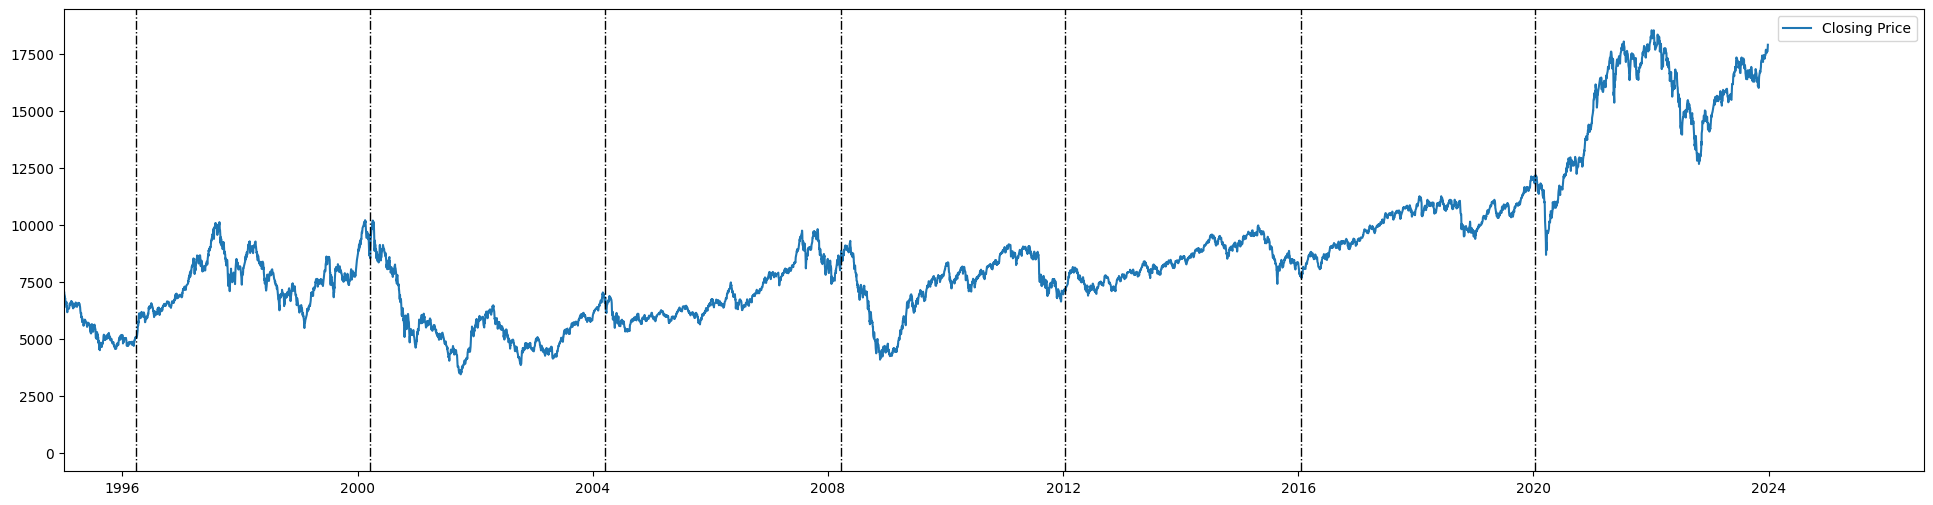

In [8]:
plt.figure(figsize = (24, 6))
plt.plot(timeline['年月日'], close_d['收盤價(元)'])

plt.xlim(pd.to_datetime('1995-01-01'))


for date in target_date:
    plt.axvline(x=date, color='black', linestyle='-.', linewidth=1)

plt.legend(['Closing Price'])
plt.show()

In [14]:
def count_return(time, n = 90):
  if n < 0:
    test = tejapi.get('TWN/APRCD1',
                    coid = 'Y9999',
                      mdate = {'gte': time - pd.Timedelta(days = abs(n)), 'lte': time})
    if len(test) == 0 or (test['mdate'].iloc[-1]!= time):
      test = tejapi.get('TWN/APRCD1',
                  coid = 'Y9999',
                    mdate = {'gte': time - pd.Timedelta(days = abs(n) + 1), 'lte': time + pd.Timedelta(days = 2)})
    first_value = test['close_adj'].iloc[0]
    last_value = test['close_adj'].iloc[-1]
  else:
    test = tejapi.get('TWN/APRCD1',
                coid = 'Y9999',
                  mdate = {'gte': time, 'lte': time + pd.Timedelta(days = n)})
    if len(test) == 0 or (test['mdate'].iloc[0]!= time):
      test = tejapi.get('TWN/APRCD1',
                  coid = 'Y9999',
                  mdate = {'gte': time - pd.Timedelta(days = 2), 'lte': time + pd.Timedelta(days = n + 1)})
    first_value = test['close_adj'].iloc[0]
    last_value = test['close_adj'].iloc[-1]
  final = ((last_value - first_value) / first_value) * 100
  return round(final, 2)

In [15]:
data_last_90 = []
data_last_60 = []
data_last_30 = []
data_last_7 = []
data_7 = []
data_30 = []
data_60 = []
data_90 = []
data_180 = []

for i in range(7):
    data_last_90.append(count_return(election_date[i], n = -90))
    data_last_60.append(count_return(election_date[i], n = -60))
    data_last_30.append(count_return(election_date[i], n = -30))
    data_last_7.append(count_return(election_date[i], n = -7))
    data_7.append(count_return(election_date[i], n = 7))
    data_30.append(count_return(election_date[i], n = 30))
    data_60.append(count_return(election_date[i], n = 60))
    data_90.append(count_return(election_date[i], n = 90))
    data_180.append(count_return(election_date[i], n = 180))

In [16]:
frame = {
    '前90天': data_last_90,
    '前60天': data_last_60,
    '前30天': data_last_30,
    '前7天': data_last_7,
    '後7天': data_7,
    '後30天': data_30,
    '後60天': data_60,
    '後90天': data_90,
    '後180天': data_180
}

years = ['1996', '2000', '2004', '2008', '2012', '2016', '2020']
df = pd.DataFrame(frame, index = years)
df

,前90天,前60天,前30天,前7天,後7天,後30天,後60天,後90天,後180天
1996,-1.85,0.57,4.16,2.66,-0.20,17.15,14.84,26.95,28.90
2000,9.47,-8.37,-15.19,-9.48,9.21,7.19,4.66,1.01,-17.59
2004,8.99,-0.39,-3.72,-6.48,-9.64,0.19,-14.32,-17.94,-14.27
2008,8.97,9.31,12.30,8.63,3.43,8.39,8.04,-5.22,-28.39
2012,-4.79,-5.61,2.62,-0.24,0.66,9.71,13.01,8.37,-1.15
2016,-9.50,-5.84,-4.56,-1.05,0.17,6.06,12.81,12.37,15.59
2020,9.46,6.00,3.53,0.02,1.00,-2.56,-12.93,-15.15,0.86


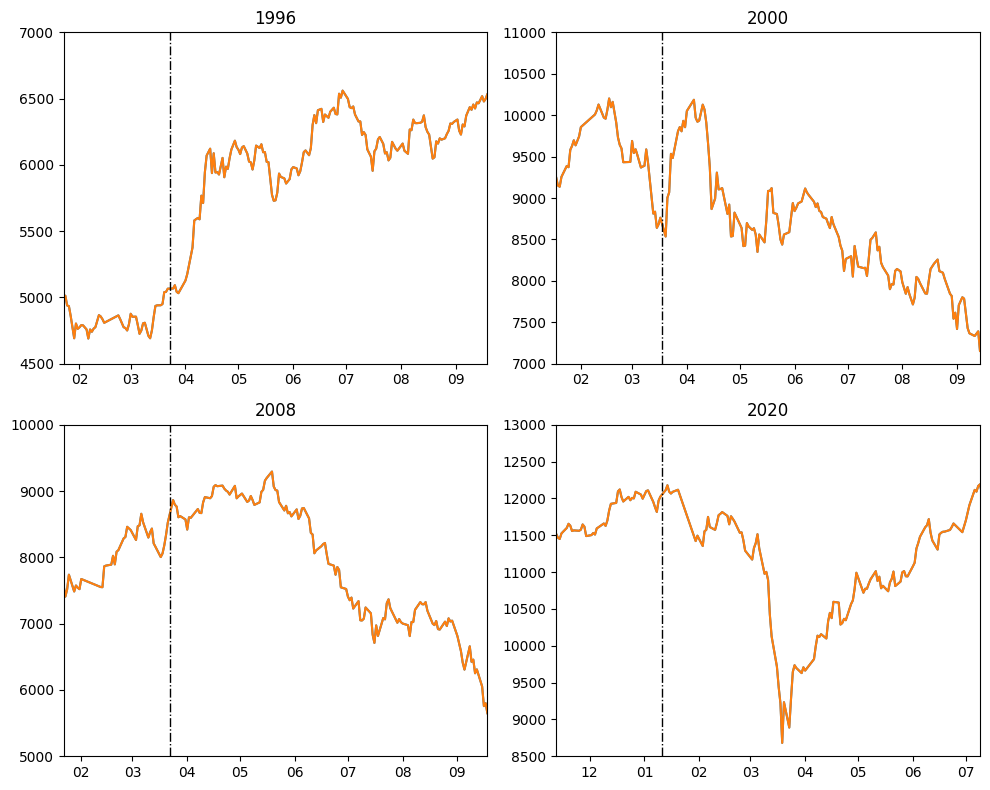

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(timeline['年月日'], close_d['收盤價(元)'])
axs[0, 0].set_xlim(election_date[0] - pd.Timedelta(days=60), election_date[0] + pd.Timedelta(days=180))
axs[0, 0].set_ylim(4500, 7000)
axs[0, 0].set_title('1996')
axs[0, 1].plot(timeline['年月日'], close_d['收盤價(元)'])
axs[0, 1].set_xlim(election_date[1] - pd.Timedelta(days=60), election_date[1] + pd.Timedelta(days=180))
axs[0, 1].set_ylim(7000, 11000)
axs[0, 1].set_title('2000')
axs[1, 0].plot(timeline['年月日'], close_d['收盤價(元)'])
axs[1, 0].set_xlim(election_date[3] - pd.Timedelta(days=60), election_date[3] + pd.Timedelta(days=180))
axs[1, 0].set_ylim(5000, 10000)
axs[1, 0].set_title('2008')
axs[1, 1].plot(timeline['年月日'], close_d['收盤價(元)'])
axs[1, 1].set_xlim(election_date[6] - pd.Timedelta(days=60), election_date[6] + pd.Timedelta(days=180))
axs[1, 1].set_ylim(8500, 13000)
axs[1, 1].set_title('2020')

# 只顯示月份
for ax in axs.flatten():
    ax.plot(timeline['年月日'], close_d['收盤價(元)'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())

    # 垂直線
    for date in target_date:
        ax.axvline(x=date, color='black', linestyle='-.', linewidth=1)

plt.tight_layout()
plt.show()